# **Experimenting with Food Vision dataset on a CNN model**

In [1]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip","r")

zip_ref.extractall()
zip_ref.close()

--2021-11-08 19:45:40--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 209.85.146.128, 209.85.147.128, 142.250.125.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|209.85.146.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip.1’

10_food_classes_all 100%[===================>] 495.13M   162MB/s    in 3.1s    

2021-11-08 19:45:43 (162 MB/s) - ‘10_food_classes_all_data.zip.1’ saved [519183241/519183241]



In [2]:
import os
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/test'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'.
There are 

**Pre Processing datas**

In [3]:
train_dir = "/content/10_food_classes_all_data/train/"
test_dir = "/content/10_food_classes_all_data/test/"

import pathlib
import numpy as np
data_dir  = pathlib.Path(train_dir)

In [4]:
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [5]:

# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (334, 512, 3)


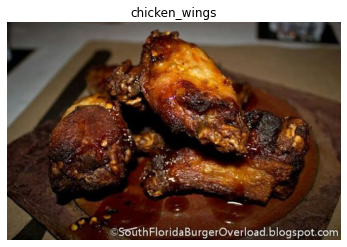

In [6]:
import random
img = view_random_image(target_dir = train_dir, target_class= random.choice(class_names))

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(1/255.)
test_datagen = ImageDataGenerator(1/255.)

train_data = train_datagen.flow_from_directory(train_dir, 
                                               target_size = (224,224),
                                               batch_size = 32,
                                               class_mode = "categorical")

test_data = train_datagen.flow_from_directory(test_dir, 
                                               target_size = (224,224),
                                               batch_size = 32,
                                               class_mode = "categorical")

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


# **Creating the model**

In [8]:
import tensorflow as tf

In [9]:
train_datagen_augmented = ImageDataGenerator(rescale= 1/255. , rotation_range= 0.2,
                                             width_shift_range = 0.2,
                                             zoom_range = 0.2,
                                             horizontal_flip= True )
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir, 
                                               target_size = (224,224),
                                               batch_size = 32,
                                               class_mode = "categorical")

Found 7500 images belonging to 10 classes.


In [10]:
model = tf.keras.Sequential([
                             tf.keras.layers.Conv2D(10,3, activation="relu"),
                             tf.keras.layers.Conv2D(10,3, activation="relu"),
                             tf.keras.layers.MaxPool2D(),
                             tf.keras.layers.Conv2D(10,3, activation="relu"),
                             tf.keras.layers.Conv2D(10,3, activation="relu"),
                             tf.keras.layers.MaxPool2D(),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(10,activation="softmax")
])

model.compile(loss = tf.keras.losses.categorical_crossentropy,
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ["accuracy"])

In [11]:
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

In [12]:
track = model.fit( train_data_augmented, epochs = 5, steps_per_epoch= len(train_data_augmented), validation_data= test_data,
                  validation_steps = 0.25 * len(test_data))

Epoch 1/5
235/235 [==============================] - ETA: 0s - loss: 2.1566 - accuracy: 0.2109

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


235/235 [==============================] - 125s 526ms/step - loss: 2.1566 - accuracy: 0.2109 - val_loss: 215.4867 - val_accuracy: 0.1672
Epoch 2/5
235/235 [==============================] - 124s 528ms/step - loss: 2.0061 - accuracy: 0.2916 - val_loss: 272.3614 - val_accuracy: 0.1750
Epoch 3/5
235/235 [==============================] - 124s 525ms/step - loss: 1.9223 - accuracy: 0.3324 - val_loss: 221.6307 - val_accuracy: 0.1922
Epoch 4/5
235/235 [==============================] - 123s 523ms/step - loss: 1.8775 - accuracy: 0.3537 - val_loss: 275.5334 - val_accuracy: 0.1562
Epoch 5/5
235/235 [==============================] - 123s 524ms/step - loss: 1.8350 - accuracy: 0.3671 - val_loss: 245.2115 - val_accuracy: 0.1625


Plotting loss curves

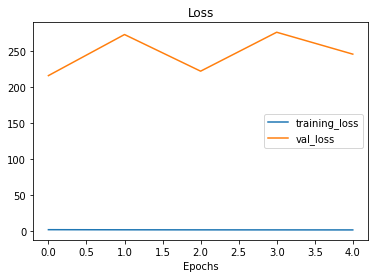

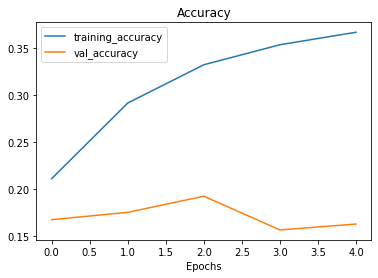

In [13]:
plot_loss_curves(track)